# 問題1：2×2マスのチェス盤の小麦の数

In [1]:
import numpy as np

SQUARES = 4

four_board_list = [1]

# Create list base numerical sequence
for _ in range(SQUARES - 1):

    four_board_list.append(four_board_list[-1]*2)

# Create ndarray with base numerical sequence "four_board_list"
four_board_ndarray = np.array(four_board_list)

# Reshape ndarray
four_board_ndarray_rs = four_board_ndarray.reshape(2, 2)

# Print number of berry in each square
print(four_board_ndarray_rs)

[[1 2]
 [4 8]]


___
# 問題2：n×mマスへの拡張

In [2]:
ROWS = 8
COLUMNS = 8

# Calculate number of berry on board at each squares
def calc_number_of_berry(row=1, col=1):

    list_number_of_berry = [1]
    for _ in range(row*col - 1):

        list_number_of_berry.append(list_number_of_berry[-1]*2)

    return list_number_of_berry

# Reshape list "target_list" after transform list to ndarray
def reshape_ndarray(target_list, row, col):

    temp_ndarray = np.array(target_list)

    return temp_ndarray.reshape(row, col)

reshaped_ndarray = reshape_ndarray(calc_number_of_berry(ROWS, COLUMNS), ROWS, COLUMNS)

print(reshaped_ndarray)

[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 4.61168602e+18 9.22337204e+18]]

___
# 問題3：小麦の数の合計

8×8マスのチェス盤の小麦の合計は1.8446744073709552e+19個です。


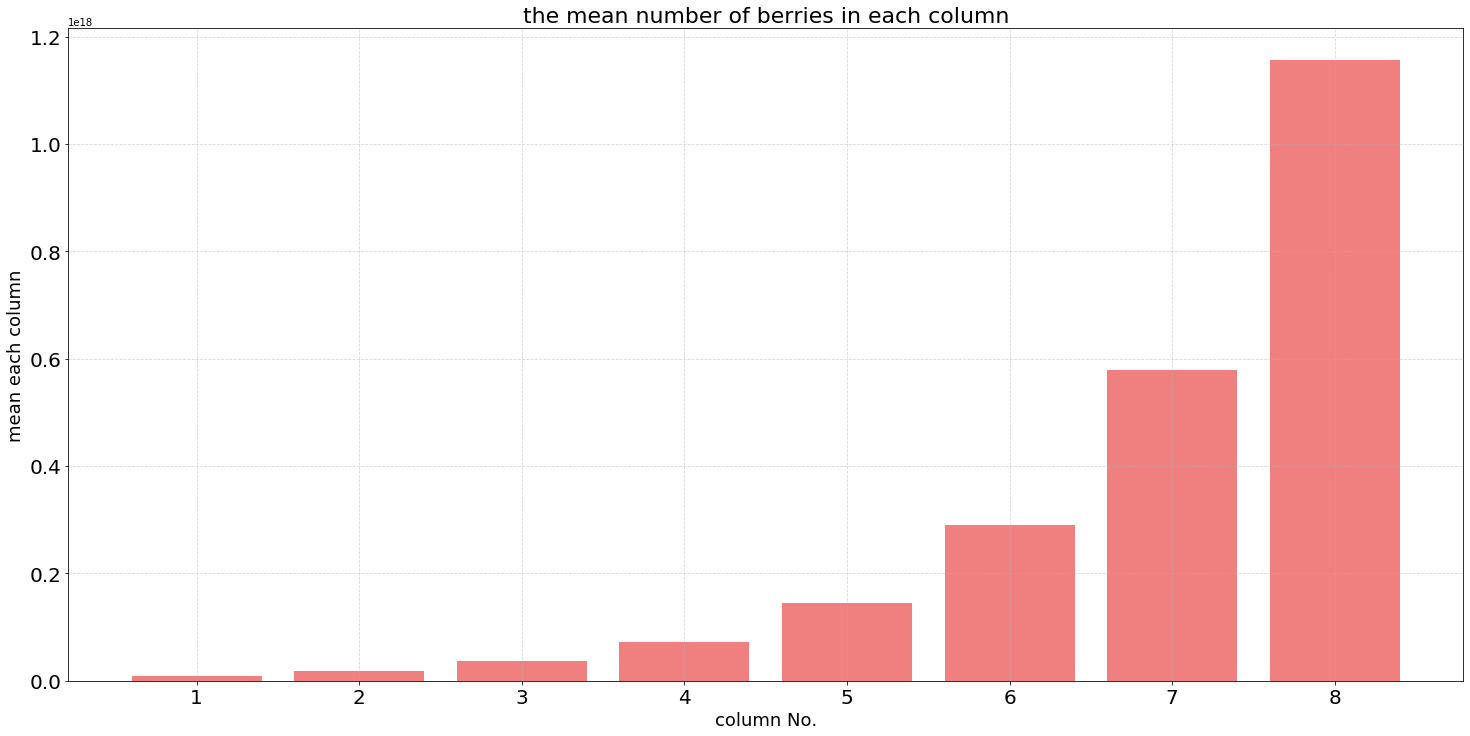

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

print("8×8マスのチェス盤の小麦の合計は{}個です。".format(reshaped_ndarray.sum()))

list_each_column_mean = reshaped_ndarray.mean(axis=0)

temp_ndarray = np.array(list_each_column_mean)
bar_left = np.arange(1, ROWS+1)

### Create graph ###

FIGSIZE_X = 25
FIGSIZE_Y = 12
X_AXIS_TOP_ADJUST = 5

# Create Figure instance for setting figure size
fig = plt.figure(figsize=(FIGSIZE_X, FIGSIZE_Y))

# Arrange graph in two columns
ax = fig.add_subplot(111)

# Set label size
ax.tick_params(labelsize=20)

# Set graph title, x-axis label and y-axis label for ax
ax.set_title("the mean number of berries in each column", fontsize=22)
ax.set_xlabel("column No.", fontsize=18)
ax.set_ylabel("mean each column", fontsize=18)

# Plot grid
ax.grid(which='major', linestyle='--', alpha=0.5)

# Plot ax
plt.bar(bar_left, temp_ndarray, color="lightcoral")

# Display graph
plt.show()

###

___
# 問題4：小麦の数のヒートマップ

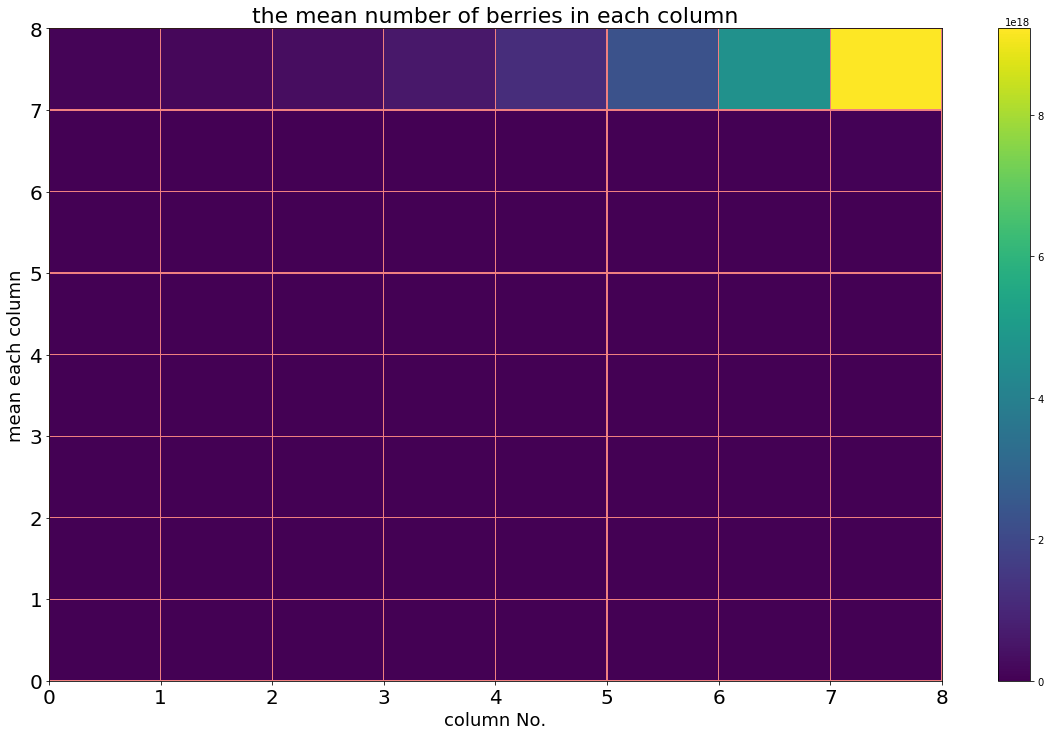

In [5]:
### Create graph ###

FIGSIZE_X = 20
FIGSIZE_Y = 12
X_AXIS_TOP_ADJUST = 5

# Create Figure instance for setting figure size
fig = plt.figure(figsize=(FIGSIZE_X, FIGSIZE_Y))

# Arrange graph in two columns
ax = fig.add_subplot(111)

# Set label size
ax.tick_params(labelsize=20)

# Set graph title, x-axis label and y-axis label for ax
ax.set_title("the mean number of berries in each column", fontsize=22)
ax.set_xlabel("column No.", fontsize=18)
ax.set_ylabel("mean each column", fontsize=18)

# Plot grid
ax.grid(which='major', linestyle='--', alpha=0.5)

# Plot ax
plt.pcolor(reshaped_ndarray, color="lightcoral")
plt.colorbar()

# Display graph
plt.show()

###

___
# 問題5：後半は前半の何倍か

In [124]:
# Reshape 2rows and 32 columns as if first row is first half and second row is second half
temp2 = np.array(calc_number_of_berry(ROWS, COLUMNS)).reshape(2,32)

print("チェス盤前半部分の小麦の数は{}個です".format(temp2[0].sum()))
print("チェス盤後半部分の小麦の数は{}個です".format(temp2[1].sum()))

print("\nチェス盤後半部分の小麦の数は、チェス盤前半部分の小麦の数の約{}倍です".format(temp2[1].sum()/temp2[0].sum()))

チェス盤前半部分の小麦の数は4294967295.0個です
チェス盤後半部分の小麦の数は1.8446744069414584e+19個です

チェス盤後半部分の小麦の数は、チェス盤前半部分の小麦の数の約4294967296.0倍です


___
# 問題６：他の計算方法によるn×mマスへの拡張

In [23]:
# Calculate number of berry on board at each squares with np.append
def calc_number_of_berry_with_np_append(row=1, col=1):

    board_ndarray_append = [1]
    for _ in range(row*col-1):

        board_ndarray_append = np.append(board_ndarray_append, board_ndarray_append[-1]*2).astype(np.uint64)

    return board_ndarray_append

# Calculate number of berry on board at each squares with broadcast
def calc_number_of_berry_with_broadcast(row=1, col=1):

    broadcast_seed = np.array(2)    
#     for _ in range(row*col):

    indices_of_squares = np.arange(row*col)
    print(indices_of_squares)

    board_ndarray_broadcast = 2**indices_of_squares.astype(np.uint64)

    return board_ndarray_broadcast

print("np.append:\n{}".format(calc_number_of_berry_with_np_append(ROWS, COLUMNS)))
print("\nbroadcast:\n{}".format(calc_number_of_berry_with_broadcast(ROWS, COLUMNS)))

np.append:
[                  1                   2                   4
                   8                  16                  32
                  64                 128                 256
                 512                1024                2048
                4096                8192               16384
               32768               65536              131072
              262144              524288             1048576
             2097152             4194304             8388608
            16777216            33554432            67108864
           134217728           268435456           536870912
          1073741824          2147483648          4294967296
          8589934592         17179869184         34359738368
         68719476736        137438953472        274877906944
        549755813888       1099511627776       2199023255552
       4398046511104       8796093022208      17592186044416
      35184372088832      70368744177664     140737488355328
     28147497

___
# 問題７：計算時間の比較

<p>計測は、別ファイル（Week2_PreQ1_timeit.ipynb）にて実施</p>
<p><b> [手法ごとのndarrayの生成にかかる時間] </b></p>

|  手法  |  実行時間[ns]  |
|:-------| :--------: |
| listのappend|  46.5  |
|  np.append  |  46.9  |
|  broadcast  |  59.7  |

<p><b> [考察] </b></p>
上表の結果となったのは、以下の理由が考えられる。
- broadcastはステップが多い
    <br>listのappendとnp.appendは、どちらも直接ndarrayを生成しているが、broadcastは、処理先の元配列を生成してから、ndarrayを生成している。
- 処理する要素が違う
    <br>broadcastは、他の手法と違い、[0]番目の要素も処理対象となる。